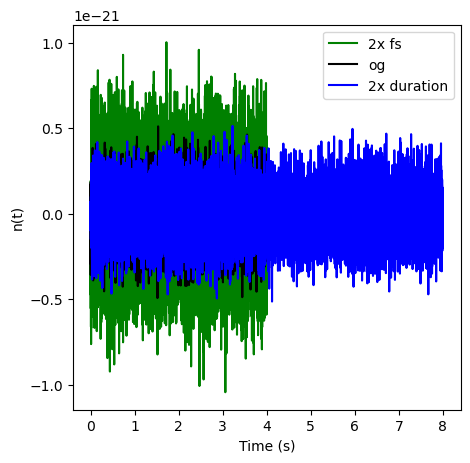

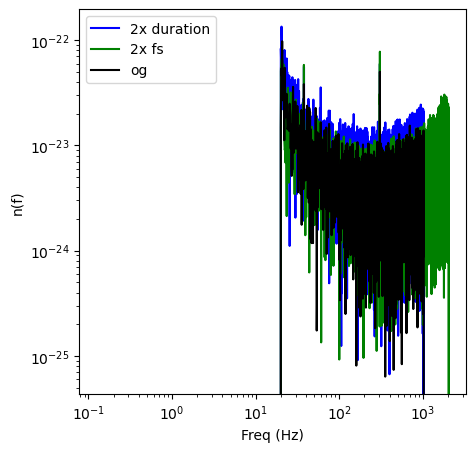

(7982.803416908997+2.8552047392977476e-16j) (16371.892707710376+9.371711588786743e-15j) (16177.902649201636+1.3334078073438421e-15j)


In [40]:
import bilby
import matplotlib.pyplot as plt
import numpy as np

# Define parameters for the noise generation
fs = 2048  # Hz
T = 4  # seconds

def get_strain_data(T, fs):
    
    ifos = bilby.gw.detector.InterferometerList(["L1"])
    ifos.set_strain_data_from_power_spectral_densities(
        sampling_frequency=fs,
        duration=T,
        start_time=0,
    )
    return ifos[0]

i1 = get_strain_data(T, fs)
i2 = get_strain_data(T, fs*2)
i3 = get_strain_data(T*2, fs)
n1 = i1.strain_data
n2 = i2.strain_data
n3 = i3.strain_data



# Plot the time domain noise realization
plt.figure(figsize=(5, 5))
plt.plot(n2.time_array, n2.time_domain_strain, label = "2x fs", c = "g")
plt.plot(n1.time_array, n1.time_domain_strain, label = "og", c = "k")
plt.plot(n3.time_array, n3.time_domain_strain, label = "2x duration", c = "b")

plt.xlabel("Time (s)")
plt.ylabel("n(t)")
plt.legend(loc=0)
plt.show()

plt.figure(figsize=(5, 5))
plt.loglog(n3.frequency_array, np.abs(n3.frequency_domain_strain), label = "2x duration", c = "b")
plt.loglog(n2.frequency_array, np.abs(n2.frequency_domain_strain), label = "2x fs", c = "g")
plt.loglog(n1.frequency_array, np.abs(n1.frequency_domain_strain), label = "og", c = "k")
plt.xlabel("Freq (Hz)")
plt.ylabel("n(f)")
plt.legend(loc=0)
plt.show()

print(i1.inner_product(n1.frequency_domain_strain), i2.inner_product(n2.frequency_domain_strain), i3.inner_product(n3.frequency_domain_strain))

In [39]:
n1.frequency_domain_strain.shape

(4097,)